In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\level_nasional_harian.csv


In [2]:
def sigmoid(x,a,b,c,d):
    return a/(1+b*np.exp(-c*x+d))

def gaussian(x,a,b,c):
    return (a/c)*np.exp(-(x-b)*(x-b)/(c*c))

In [9]:
nld_df = pd.read_csv('data/level_nasional_harian.csv')
nld_df.head()

,date,totalconfirmed,dailyconfirmed
0,3/2/2020,2,2
1,3/3/2020,2,0
2,3/4/2020,2,0
3,3/5/2020,2,0
4,3/6/2020,4,2


In [10]:
nld_df.tail()

,date,totalconfirmed,dailyconfirmed
288,12/15/2020,629429,6120
289,12/16/2020,636154,6725
290,12/17/2020,643508,7354
291,12/18/2020,650197,6689
292,12/19/2020,657948,7751


Text(0, 0.5, '')

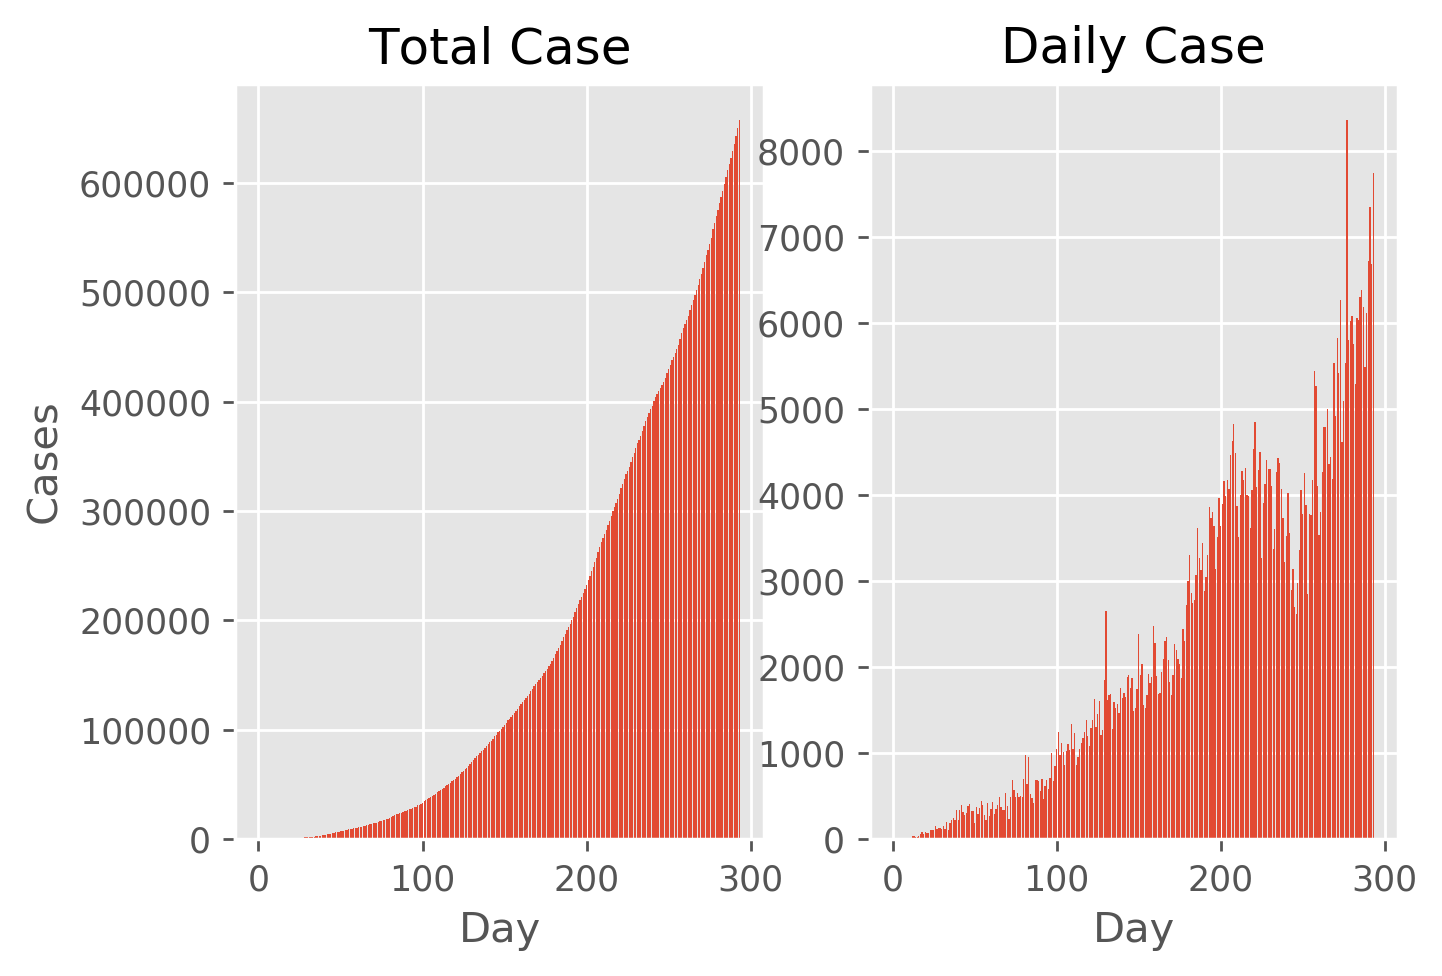

In [25]:
yt = nld_df['totalconfirmed'].values
yd = nld_df['dailyconfirmed'].values
X = np.arange(0,yt.shape[0])+1
plt.figure(dpi=250)
plt.subplot(121)
plt.title('Total Case')
plt.bar(X,yt)
plt.xlabel('Day')
plt.ylabel('Cases')
plt.subplot(122)
plt.title('Daily Case')
plt.bar(X,yd)
plt.xlabel('Day')
plt.ylabel('')

In [26]:
from scipy.optimize import curve_fit

def cfplot(func,X,y,p0,T,dpi,title):
    popt,_ = curve_fit(f=func,xdata=X,ydata=y,p0=p0)
    y_pred = []
    for x in range(1,T+1):
        y_pred.append(func(x,*popt))
    x_ax1 = np.arange(len(y_pred))
    plt.figure(dpi=dpi)
    plt.plot(x_ax1,np.array(y_pred),color='blue',label='Prediction')
    x_ax2 = np.arange(y.shape[0])
    plt.bar(x_ax2,y,width=0.8,color='red',label='Actual')
    plt.xlabel('Day')
    plt.ylabel('Case')
    ##plt.axvline(x=x_ax2[-1],color='orange')
    plt.legend()
    plt.title(title)
    loss = int((1/y.shape[0])*np.sum((y-np.array(y_pred[:y.shape[0]]))**2))
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    plt.text(0.6*xlim[1],0.5*ylim[1],str('MSE : '+str(loss)))
    plt.show()
    return popt

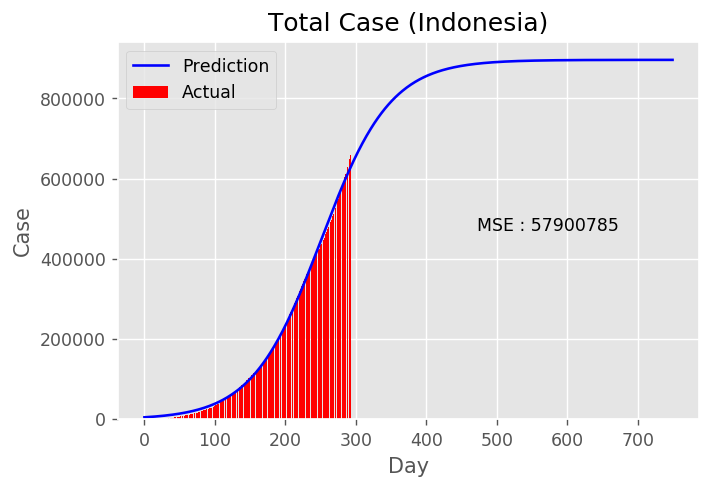

In [27]:
nld_df = pd.read_csv('data/level_nasional_harian.csv')
y = nld_df['totalconfirmed'].values
X = np.arange(0,y.shape[0])+1
popt = cfplot(sigmoid,X,y,[1,1,1,1],750,125,'Total Case (Indonesia)')

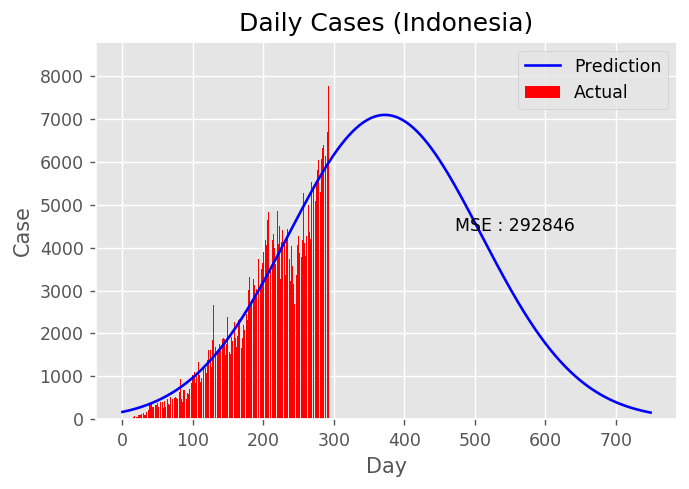

In [28]:
y = nld_df['dailyconfirmed'].values
X = np.arange(0,y.shape[0])
popt = cfplot(gaussian,X,y,[100,100,100],750,125,'Daily Cases (Indonesia)')